In [1]:
import numpy as np
import logging
import itertools
from tqdm import tqdm
import datetime
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy.stats import chi2
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error 
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

In [ ]:
df = pd.read_csv('/mnt/ffs24/home/lirui15/Research/Model1-ECFP/model1_reduced1_BCF.csv')

features = df.iloc[:, :-1] 
target = df.iloc[:, -1] 

In [ ]:
print(type(features))  
print(type(target))   
feature_names = features.columns.tolist()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
features, target = shuffle(features, target, random_state=42)

In [ ]:
#scaler = StandardScaler()
#features = scaler.fit_transform(features)

In [ ]:
X_train_val, X_test, Y_train_val, Y_test = train_test_split(features, target, test_size=0.1, random_state=42)

X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.2, random_state=42)

In [8]:
X_train.shape

(1455, 92)

In [ ]:
logger = logging.getLogger('RF_gridsearch_model1_reduced1_BCF')
logger.setLevel(logging.INFO)

handler = logging.FileHandler('RF_gridsearch_model1_reduced1_BCF.log')
handler.setLevel(logging.INFO)

logger.addHandler(handler)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
param_grid = {'n_estimators': range(10, 120, 10),
              'max_depth': range(1,21,2),
              'min_samples_leaf': range(1,11,2),
              'min_samples_split': range(2,11,2),
              'bootstrap':[True]}

num_combinations = len(list(itertools.product(*param_grid.values())))

cv = 10

total_fits = num_combinations * cv

logger.info("\nParameter grid: %s", param_grid)
logger.info("CV: %d", cv)
logger.info("Total number of fits: %d", total_fits)

class TqdmUpTo(tqdm):
    def update_to(self, b=1, bsize=1, tsize=None):
        if tsize is not None:
            self.total = tsize
        self.update(b * bsize - self.n)

with TqdmUpTo(unit='B', unit_scale=True, miniters=1, desc='GridSearchCV') as t:
期
    start_time = datetime.datetime.now()
    logger.info("Start time: %s", start_time)
    
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=cv, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, Y_train.values.ravel())
    
    end_time = datetime.datetime.now()
    logger.info("End time: %s", end_time)

    total_time = end_time - start_time
    logger.info("Total run time: %s", total_time)

logger.info("Best parameters: %s", grid_search.best_params_)
logger.info("Best score: %f", grid_search.best_score_)

GridSearchCV: 0.00B [00:00, ?B/s]

Fitting 10 folds for each of 2750 candidates, totalling 27500 fits
[CV] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END boot

GridSearchCV: 0.00B [10:45, ?B/s]


In [ ]:
param_grid = {'n_estimators': range(10,120,10),
              'max_depth': range(1,21,2),
              'min_samples_leaf': range(1,11,2),
              'min_samples_split': range(2,11,2),
              'bootstrap':[False]}

num_combinations = len(list(itertools.product(*param_grid.values())))

cv = 10

total_fits = num_combinations * cv

logger.info("\nParameter grid: %s", param_grid)
logger.info("CV: %d", cv)
logger.info("Total number of fits: %d", total_fits)

class TqdmUpTo(tqdm):
    def update_to(self, b=1, bsize=1, tsize=None):
        if tsize is not None:
            self.total = tsize
        self.update(b * bsize - self.n)

with TqdmUpTo(unit='B', unit_scale=True, miniters=1, desc='GridSearchCV') as t:

    start_time = datetime.datetime.now()
    logger.info("Start time: %s", start_time)
    
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=cv, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, Y_train.values.ravel())
    
    end_time = datetime.datetime.now()
    logger.info("End time: %s", end_time)


    total_time = end_time - start_time
    logger.info("Total run time: %s", total_time)

logger.info("Best parameters: %s", grid_search.best_params_)
logger.info("Best score: %f", grid_search.best_score_)

GridSearchCV: 0.00B [00:00, ?B/s]

Fitting 10 folds for each of 2750 candidates, totalling 27500 fits

[CV] END bootstrap=True, max_depth=19, min_samples_leaf=7, min_samples_split=4, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=19, min_samples_leaf=7, min_samples_split=4, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=19, min_samples_leaf=7, min_samples_split=4, n_estimators=20; total time=   0.2s
[CV] END bootstrap=True, max_depth=19, min_samples_leaf=7, min_samples_split=4, n_estimators=40; total time=   0.4s
[CV] END bootstrap=True, max_depth=19, min_samples_leaf=7, min_samples_split=4, n_estimators=60; total time=   0.6s
[CV] END bootstrap=True, max_depth=19, min_samples_leaf=7, min_samples_split=4, n_estimators=80; total time=   0.7s
[CV] END bootstrap=True, max_depth=19, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=19, min_samples_leaf=7, min_samples_split=6, n_estimators=20; total time=   0.2s
[CV

GridSearchCV: 0.00B [16:09, ?B/s]


In [ ]:
best_params = {
    'n_estimators':100,
    'max_depth':19,
    'min_samples_leaf':1,
    'min_samples_split':2,
    'bootstrap':True,
    'random_state':100
}
model_best = RandomForestRegressor(**best_params)
model_best.fit(X_train,Y_train.values.ravel())

RandomForestRegressor(max_depth=19, random_state=100)

In [ ]:
# Predict on the training set
y_train_pred = model_best.predict(X_train)
mse_train = mean_squared_error(Y_train, y_train_pred)
print(f"Mean squared error on the training set: {mse_train}")
# Calculate the root mean squared error on the training set
rmse_train = np.sqrt(mse_train)
print(f"Root mean squared error on the training set: {rmse_train}")
# Calculate the mean absolute error on the training set
mae_train = mean_absolute_error(Y_train, y_train_pred)
print(f"Mean absolute error on the training set: {mae_train}")
# Calculate the R² score on the training set
r2_train = r2_score(Y_train, y_train_pred)
print(f"R² score on the training set: {r2_train}")

# Predict on the validation set
y_pred = model_best.predict(X_val)
# Calculate the mean squared error
mse = mean_squared_error(Y_val, y_pred)
print(f"Mean squared error on the validation set: {mse}")
# Calculate the root mean squared error
rmse = np.sqrt(mse)
print(f"Root mean squared error on the validation set: {rmse}")
# Calculate the mean absolute error
mae = mean_absolute_error(Y_val, y_pred)
print(f"Mean absolute error on the validation set: {mae}")
# Calculate the R² score
r2 = r2_score(Y_val, y_pred)
print(f"R² score on the validation set: {r2}")

# Predict on the test set
y_test_pred = model_best.predict(X_test)

# Calculate the mean squared error on the test set
mse_test = mean_squared_error(Y_test, y_test_pred)
print(f"Mean squared error on the test set: {mse_test}")

# Calculate the root mean squared error on the test set
rmse_test = np.sqrt(mse_test)
print(f"Root mean squared error on the test set: {rmse_test}")

# Calculate the mean absolute error on the test set
mae_test = mean_absolute_error(Y_test, y_test_pred)
print(f"Mean absolute error on the test set: {mae_test}")

# Calculate the R² score on the test set
r2_test = r2_score(Y_test, y_test_pred)
print(f"R² score on the test set: {r2_test}")

Mean squared error on the training set: 0.03254448831738426
Root mean squared error on the training set: 0.1804009099682822
Mean absolute error on the training set: 0.11929609771748491
R² score on the training set: 0.9874062478188337
Mean squared error on the validation set: 0.17537737765440944
Root mean squared error on the validation set: 0.4187808229305748
Mean absolute error on the validation set: 0.25827316073123613
R² score on the validation set: 0.9272565052139545
Mean squared error on the test set: 0.14866523481864374
Root mean squared error on the test set: 0.385571309641477
Mean absolute error on the test set: 0.24730684243346637
R² score on the test set: 0.9506066079190484


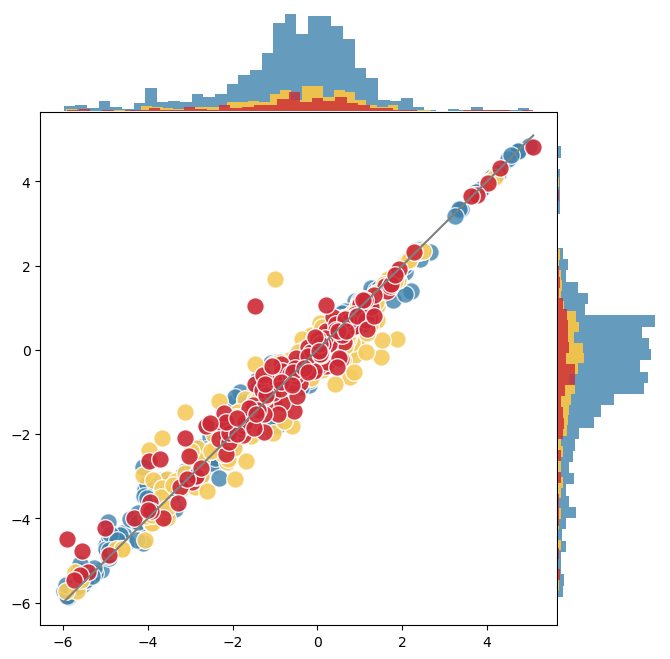

In [ ]:
fig = plt.figure(figsize=(8, 8))
grid = plt.GridSpec(6, 6, hspace=0.01, wspace=0.01)

ax_main = fig.add_subplot(grid[1:6, 0:5])
ax_main.scatter(Y_train, y_train_pred, color='#3F82AC', alpha=0.8, s=160, edgecolor='white', label='Training set')
ax_main.scatter(Y_val, y_pred, color='#F5CB5C', alpha=0.9, s=160, edgecolor='white', label='Validation set')
ax_main.scatter(Y_test, y_test_pred, color='#CC2936', alpha=0.9, s=160, edgecolor='white', label='Test set')

min_val = min(Y_train.min(), Y_val.min(), Y_test.min())
max_val = max(Y_train.max(), Y_val.max(), Y_test.max())
ax_main.plot([min_val, max_val], [min_val, max_val], color='gray', linestyle='-', linewidth=1.5)

ax_histx = fig.add_subplot(grid[0, 0:5])
ax_histx.hist(Y_train, color='#3F82AC', alpha=0.8, bins=40)
ax_histx.hist(Y_val, color='#fcc642', alpha=0.9, bins=40)
ax_histx.hist(Y_test, color='#CC2936', alpha=0.8, bins=40)

ax_histx.set_xticks([])
ax_histx.set_yticks([])
ax_histx.set_xlabel('')
ax_histx.set_ylabel('')
ax_histx.spines['top'].set_visible(False)
ax_histx.spines['right'].set_visible(False)
ax_histx.spines['bottom'].set_visible(False)
ax_histx.spines['left'].set_visible(False)
ax_histx.set_xlim(ax_main.get_xlim())

ax_histy = fig.add_subplot(grid[1:6, 5])
ax_histy.hist(y_train_pred, color='#3F82AC', alpha=0.8, bins=40, orientation='horizontal')
ax_histy.hist(y_pred, color='#fcc642', alpha=0.9, bins=40, orientation='horizontal')
ax_histy.hist(y_test_pred, color='#CC2936', alpha=0.8, bins=40, orientation='horizontal')

ax_histy.set_xticks([])
ax_histy.set_yticks([])
ax_histy.set_xlabel('')
ax_histy.set_ylabel('')
ax_histy.spines['top'].set_visible(False)
ax_histy.spines['right'].set_visible(False)
ax_histy.spines['bottom'].set_visible(False)
ax_histy.spines['left'].set_visible(False)
ax_histy.set_ylim(ax_main.get_ylim()) 

plt.savefig('RF-BCF.pdf', dpi=300, bbox_inches='tight')
plt.show()